### 局部加权线性回归(Locally Weighted Linear Regression,LWLR)
#### 其回归系数的计算是基于：
$$\hat w = (X^TWX)^-1 X^TWy$$
#### 其中W是一个矩阵，用来给每个数据点赋予权重。
#### 第i个样本点对应的权重为：
$$w(i,i)=exp\left ( \frac{|x^{(i)}-x|}{-2k^2} \right )$$

---
#### 程序清单8-2 局部加权线性回归函数

In [2]:
import numpy as np


def lwlr(testPoint,xArr,yArr,k=1.0):
    """以测试点testPoint为中心,对其训练并预测
    返回对测试点testPoint的预测值
    testPoint:行向量
    """
    xMat=np.mat(xArr)
    yMat=np.mat(yArr).T
    m=np.shape(xMat)[0]
    weights=np.mat(np.eye(m))    # 利用对家矩阵初始化权重
    
    for j in range(m):
        diffMat=testPoint-xMat[j,:]
        weights[j,j]=np.exp(diffMat*diffMat.T/(-2*k**2))    # 更新对角线上的权值
    xTx=xMat.T*(weights*xMat)
    if np.linalg.det(xTx)==0:
        print('xTx 行列式为0,不可求逆')
        return
    ws=xTx.I*(xMat.T*(weights*yMat))
    return testPoint*ws


def lwlrTest(testArr,xArr,yArr,k):
    m=np.shape(testArr)[0]
    yHat=np.zeros(m)
    for i in range(m):
        yHat[i]=lwlr(testArr[i,:],xArr,yArr,k)
    return yHat


#### 之前的数据加载函数：

In [3]:
def loadDataSet(filename):
    numFeat=len(open(filename).readline().strip().split('\t'))-1
    dataMat=[]
    labelMat=[]
    for line in open(filename).readlines():
        lineArr=[]
        currentLine=line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(currentLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(currentLine[-1]))
    return dataMat,labelMat


dataPath='D:\\机器学习实战代码\\machinelearninginaction\\Ch08\\ex0.txt'
xArr,yArr=loadDataSet(dataPath)

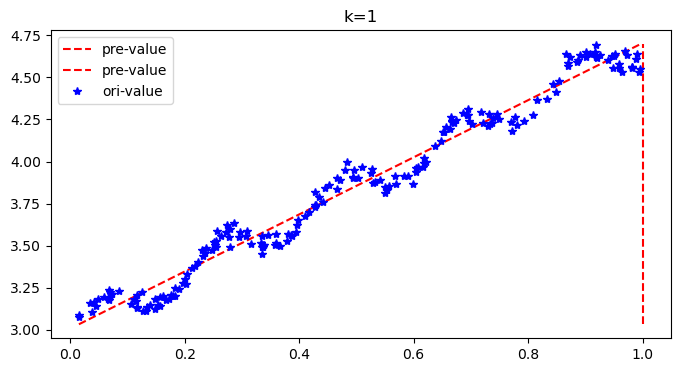

In [15]:
import matplotlib.pyplot as plt


def kPlot(testArr,xArr,yArr,k: float=0.5):
    xMat=np.mat(xArr)
    yMat=np.mat(yArr)
    testMat=np.mat(testArr)
    
    idx=xMat[:,1].argsort(0)    # 将x的值排序
    xSorted=xMat[idx][:,-1]
    yHat=lwlrTest(testMat,xMat,yMat,k=k)
    plt.figure(figsize=(8,4))
    plt.plot(xSorted,yHat[idx],'r--',label='pre-value')
    plt.plot(xMat[:,-1],yMat.T,'b*',label='ori-value')
    plt.legend()
    plt.title('k={}'.format(k))
    plt.show()
    
    
kPlot(xArr,xArr,yArr,k=1)    # 欠拟合

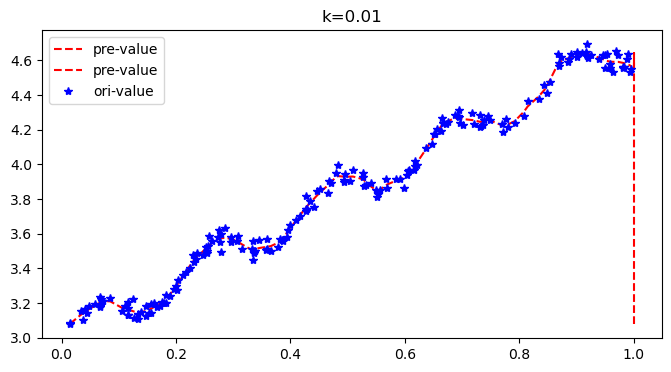

In [17]:
kPlot(xArr,xArr,yArr,k=0.01)    # 正好拟合

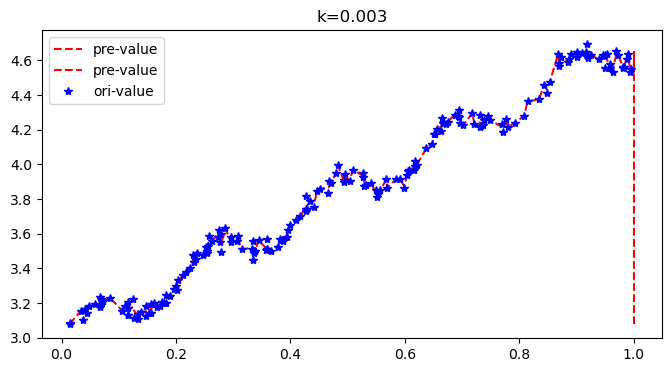

In [19]:
kPlot(xArr,xArr,yArr,k=0.003)    # 有点过拟合